# EDA Feature Selection and Model Selection

### 📘 Notebook Overview

This notebook is divided into two main sections — **EDA Feature Selection** and **Model Selection** — to explore, clean, and prepare the Adult Census dataset for predictive modeling. Each section includes interpretations to support decision-making based on statistical and model-driven insights.

---

### 🔍 EDA Feature Selection

### ▪️Checking Data Distribution in Imputed Train and Test set  
Visualizes the distribution of numerical features after imputation to ensure consistency and detect any unexpected shifts.  

### ▪️ Checking Data Distribution and Identyfing Outliers  
Analyzes feature distributions using histograms and boxplots to identify potential outliers.  

### ▪️ Checking the Correlationship between Numerical Features and Target Column with Kruskal-Wallis H Test  
Applies Kruskal-Wallis H test to assess whether numerical features differ significantly across income classes.  

### ▪️ Checking the Correlationship between Categorical Features and Target Column with Chi-Squared Test  
Performs Chi-Squared test to evaluate associations between categorical features and the target.  

### ▪️ Checking Feature Importance with Random Forest  
Uses a Random Forest classifier to quantify the importance of each feature in predicting income.  

### ▪️ Drop Features and Save the files  
Drops selected low-impact features and saves the refined dataset.  

---

### 🤖 Model Selection

### ▪️ Check Multicollinearity Between Numerical Variables  
Examines correlations between numerical features to detect multicollinearity using correlation matrices.  

---


# EDA Feature Selection

## Checking Data Distribution in Imputed Train and Test set

Total samples in Train dataset: 38379
Total samples in Test dataset: 9605


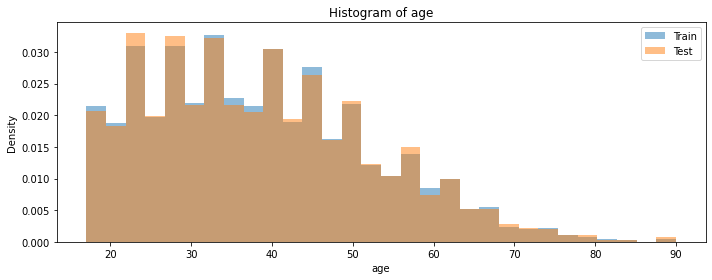

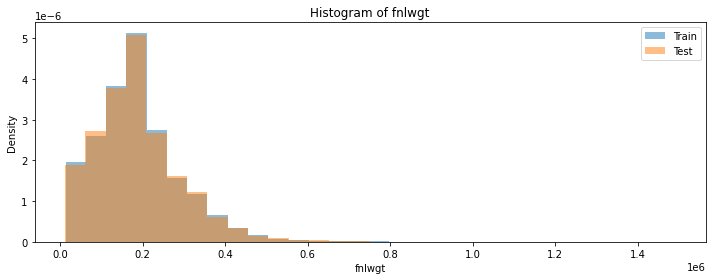

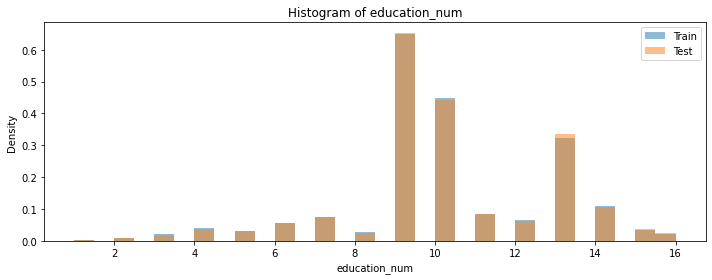

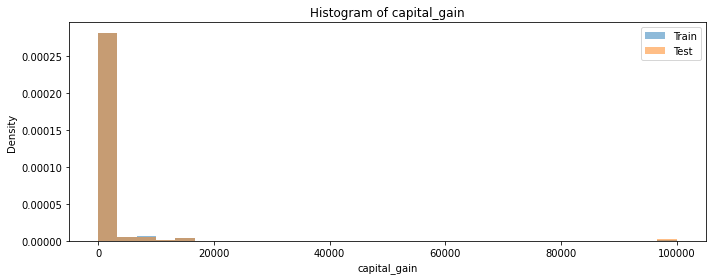

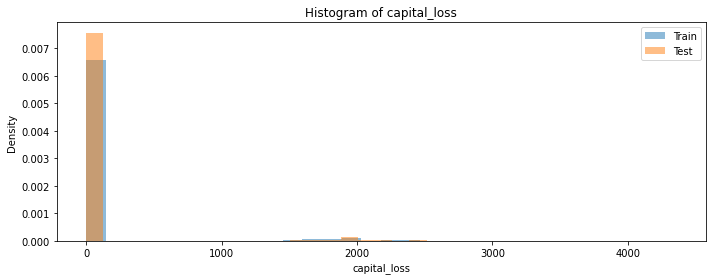

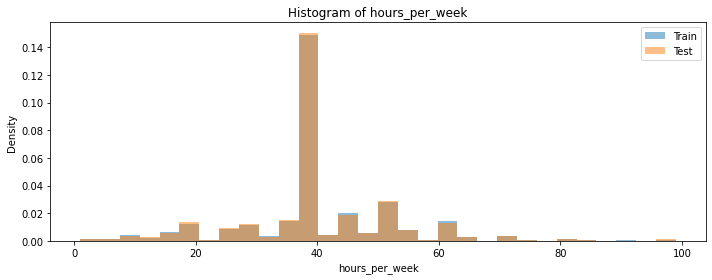

<Figure size 864x360 with 0 Axes>

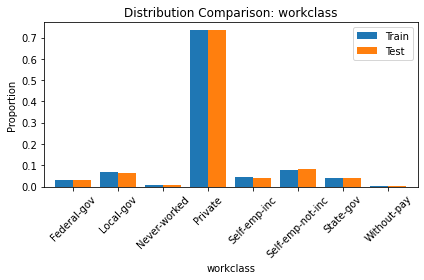

<Figure size 864x360 with 0 Axes>

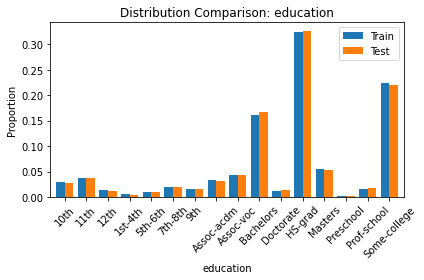

<Figure size 864x360 with 0 Axes>

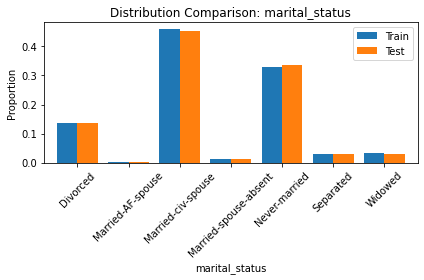

<Figure size 864x360 with 0 Axes>

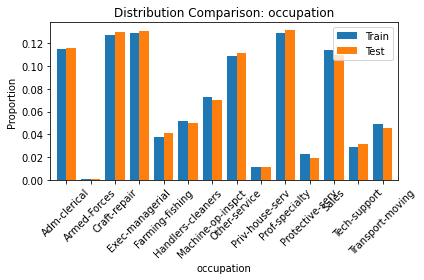

<Figure size 864x360 with 0 Axes>

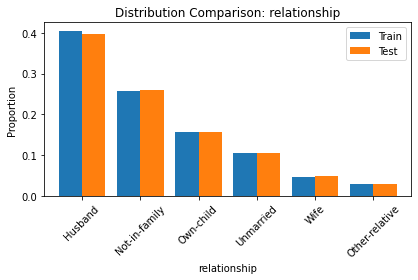

<Figure size 864x360 with 0 Axes>

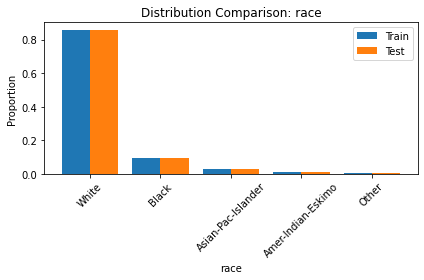

<Figure size 864x360 with 0 Axes>

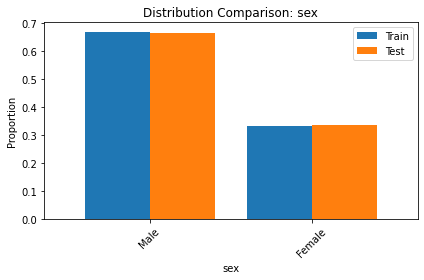

<Figure size 864x360 with 0 Axes>

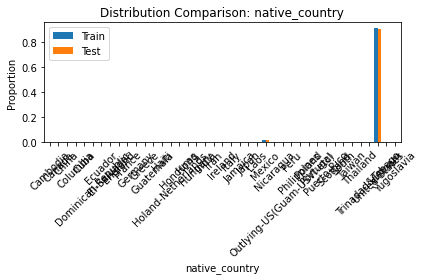

<Figure size 864x360 with 0 Axes>

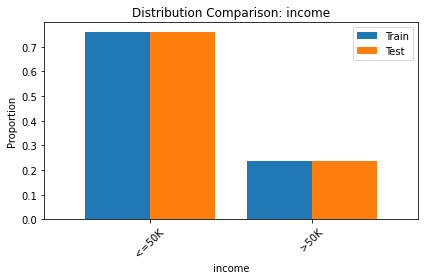

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
train_df = pd.read_csv("adult_combined_train_80_imputed.csv")
test_df = pd.read_csv("adult_combined_test_20_imputed.csv")

# Print total sample counts
print(f"Total samples in Train dataset: {train_df.shape[0]}")
print(f"Total samples in Test dataset: {test_df.shape[0]}")

# Identify numerical and categorical columns
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = train_df.select_dtypes(include=['object']).columns.tolist()

# ------------------------
# Compare Numerical Columns
# ------------------------
def plot_numerical_histograms(train, test, cols, bins=30):
    for col in cols:
        plt.figure(figsize=(10, 4))
        plt.hist(train[col], bins=bins, alpha=0.5, label='Train', density=True)
        plt.hist(test[col], bins=bins, alpha=0.5, label='Test', density=True)
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Density')
        plt.legend()
        plt.tight_layout()
        plt.show()

# --------------------------
# Compare Categorical Columns
# --------------------------
def plot_categorical_distributions_bar(train, test, cols):
    for col in cols:
        plt.figure(figsize=(12, 5))
        
        # Calculate relative frequencies
        train_freq = train[col].value_counts(normalize=True)
        test_freq = test[col].value_counts(normalize=True)

        # Combine into one DataFrame
        combined_df = pd.DataFrame({'Train': train_freq, 'Test': test_freq}).fillna(0)

        # Plot bar chart
        combined_df.plot(kind='bar', width=0.8)
        plt.title(f'Distribution Comparison: {col}')
        plt.ylabel('Proportion')
        plt.xlabel(col)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Run the comparison plots
plot_numerical_histograms(train_df, test_df, numerical_cols)
plot_categorical_distributions_bar(train_df, test_df, categorical_cols)


## Checking Data Distribution and Identyfing Outliers

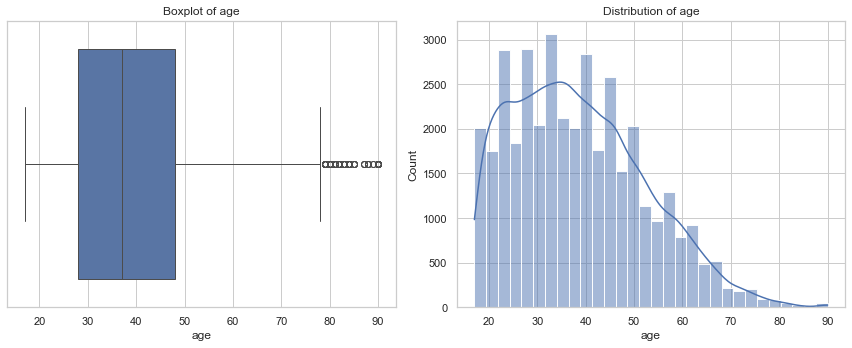

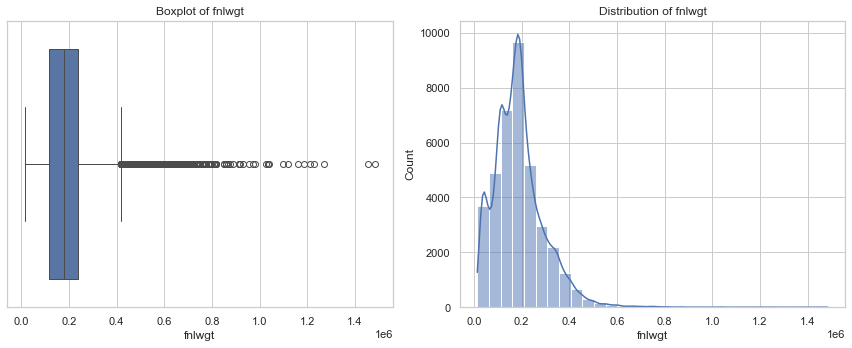

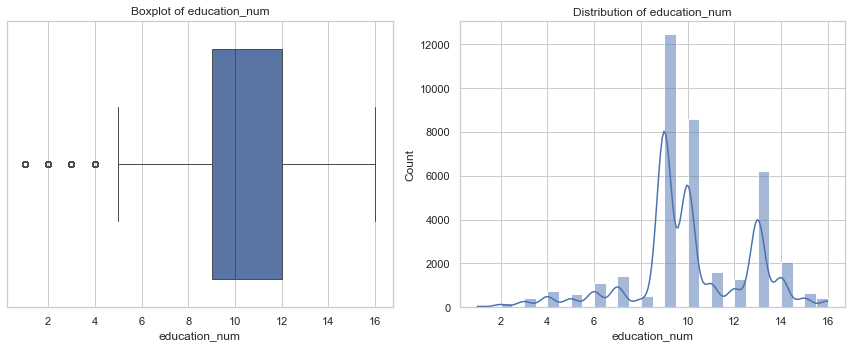

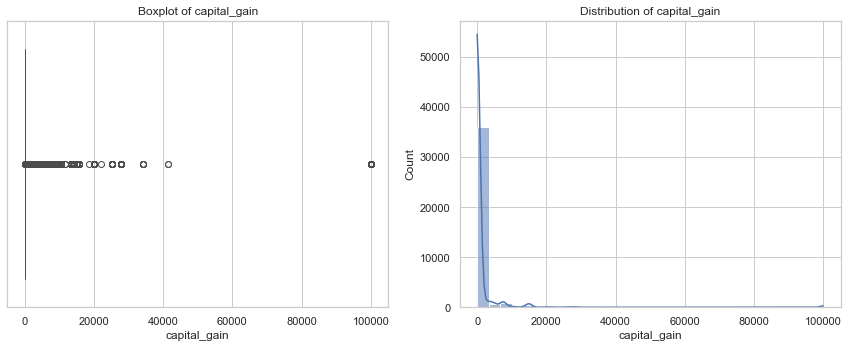

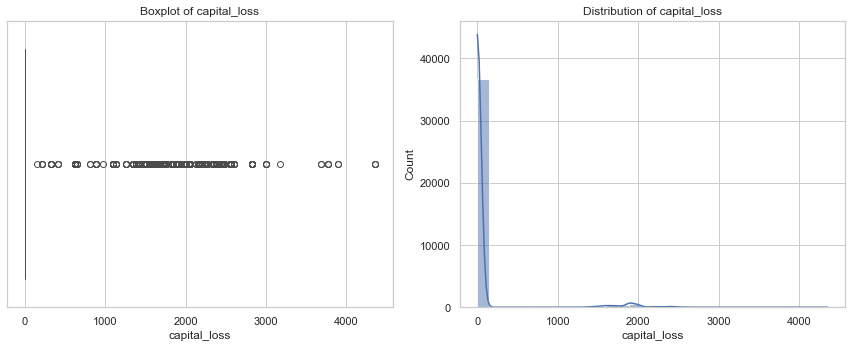

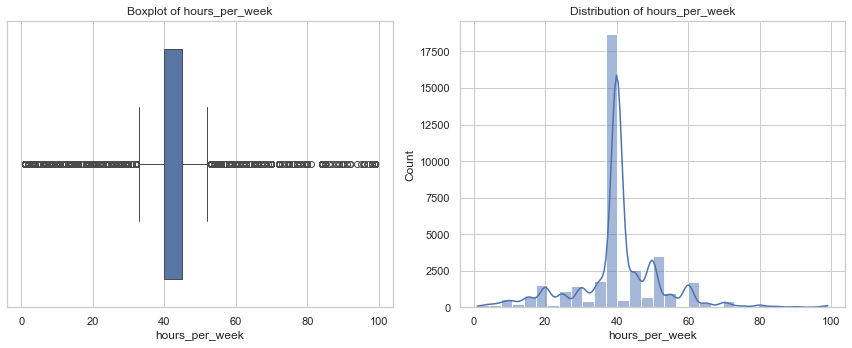

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
train_df = pd.read_csv('adult_combined_train_80_imputed.csv')

# Identify numerical columns
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns

# Set the visual style
sns.set(style="whitegrid")

# Create boxplots and distribution plots for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(12, 5))

    # Boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(x=train_df[col])
    plt.title(f'Boxplot of {col}')

    # Distribution Plot with KDE
    plt.subplot(1, 2, 2)
    sns.histplot(train_df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')

    plt.tight_layout()
    plt.show()
    

### 📝 Notes on Outlier Handling and Feature Transformations

After performing multiple evaluations across different models, I found that **retaining the outliers in their original form yielded the best overall model performance**.

#### ✅ Capital Gain and Capital Loss
- Two transformation methods were tested on the `capital_gain` and `capital_loss` features:
  1. **Binarization** (0 vs >0)
  2. **Log transformation** using `np.log1p()`
- Both methods led to a **decrease in model performance**, with **binarization having a more significant negative impact**.
- The log transformation performed relatively well with the default classification threshold (0.5), but once the threshold was adjusted, the model's ability to predict the `>50K` class significantly dropped.
- **Decision**: Retain the original values of `capital_gain` and `capital_loss`.

## Checking the Correlationship between Numerical Features and Target Column with Kruskal-Wallis H Test

To evaluate whether the distributions of numerical features differ significantly across income groups (`<=50K` and `>50K`), the Kruskal-Wallis H test was applied. The results are as follows:

In [3]:
import pandas as pd
from scipy.stats import kruskal

# Load cleaned data
df = pd.read_csv('adult_combined_train_80_imputed.csv')

# Encode the binary income column
df['income'] = df['income'].apply(lambda x: 1 if '>50K' in x else 0)

# Select numeric features (excluding income)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols.remove('income')

print("🔍 Kruskal-Wallis H Test Results:\n")

# Apply Kruskal-Wallis test for each numeric feature
for col in numeric_cols:
    group1 = df[df['income'] == 0][col]
    group2 = df[df['income'] == 1][col]
    
    stat, p = kruskal(group1, group2)
    print(f"{col}: H-statistic = {stat:.4f}, p-value = {p:.4f}")

🔍 Kruskal-Wallis H Test Results:

age: H-statistic = 2752.7824, p-value = 0.0000
fnlwgt: H-statistic = 1.3173, p-value = 0.2511
education_num: H-statistic = 4196.1020, p-value = 0.0000
capital_gain: H-statistic = 2919.4135, p-value = 0.0000
capital_loss: H-statistic = 724.5646, p-value = 0.0000
hours_per_week: H-statistic = 2831.7150, p-value = 0.0000


### ✅ Interpretation:
These findings support the decision to **retain all features except `fnlwgt`** for modeling, as it does not show a significant relationship with income groups based on the Kruskal-Wallis H test. The other features contribute meaningful distinctions between the income classes.

## Checking the Correlationship between Categorical Features and Target Column with Chi-Squared Test

To evaluate the association between each categorical feature and the target variable (`income`), a Chi-Square Test of Independence was conducted. The results are as follows:

In [4]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load your dataset
df = pd.read_csv("adult_combined_train_80_imputed.csv")

# Define the categorical columns and target
categorical_columns = [
    "workclass", "education", "marital_status", "occupation", 
    "relationship", "race", "sex", "native_country"
]
target = "income"

# Run Chi-Square test
chi2_results = []

for col in categorical_columns:
    contingency_table = pd.crosstab(df[col], df[target])
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
    chi2_results.append({
        'Feature': col,
        'Chi2 Statistic': chi2_stat,
        'Degrees of Freedom': dof,
        'p-value': p_val
    })

# Convert to DataFrame for display
chi2_df = pd.DataFrame(chi2_results)
chi2_df.sort_values(by='Chi2 Statistic', ascending=False, inplace=True)

print("🔍 Chi-Square Test Results:\n")

# Show results
print(chi2_df)

🔍 Chi-Square Test Results:

          Feature  Chi2 Statistic  Degrees of Freedom        p-value
4    relationship     7883.639398                   5   0.000000e+00
2  marital_status     7652.648366                   6   0.000000e+00
1       education     5255.731301                  15   0.000000e+00
3      occupation     4480.064759                  13   0.000000e+00
6             sex     1778.554180                   1   0.000000e+00
0       workclass      798.120226                   7  4.722120e-168
5            race      395.351340                   4   2.809907e-84
7  native_country      355.470540                  40   3.310812e-52


### ✅ Interpretation:
All tested categorical variables show statistically significant relationships with income level. These results justify **including all of these features in the modeling process**.

## Checking Feature Importance with Random Forest

In addition to statistical tests, we will also use **feature importance from a Random Forest model** to assess how each feature contributes to prediction performance when considered in combination with others. This can help capture non-linear and interaction effects that may not be evident through univariate analysis alone.

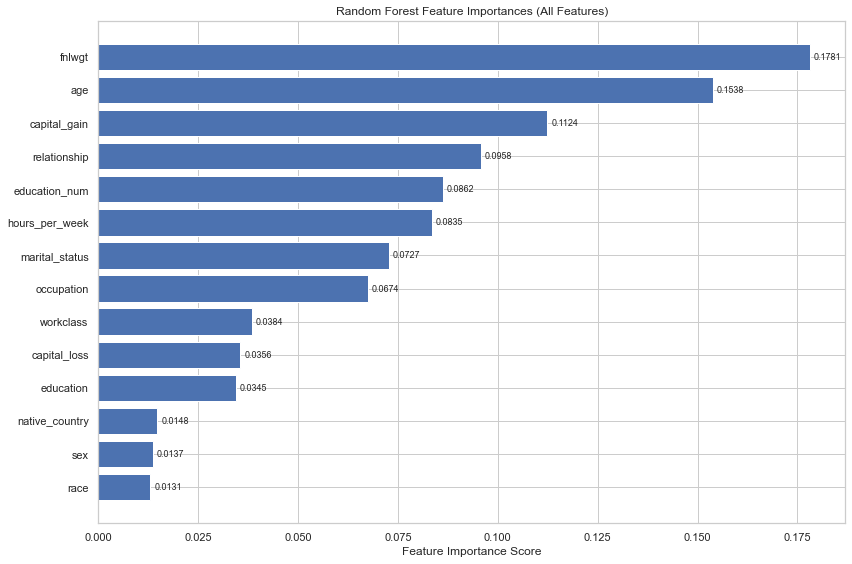

In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

# Load data
train_df = pd.read_csv("adult_combined_train_80_imputed.csv")

# Split features and target
X_train = train_df.drop(columns=["income"])
y_train = train_df["income"]

# Encode categorical features
encoders = {}
for col in X_train.columns:
    if X_train[col].dtype == "object":
        le = LabelEncoder()
        X_train[col] = le.fit_transform(X_train[col].astype(str))
        encoders[col] = le

# Train Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Feature importances
importances = model.feature_importances_
feature_names = X_train.columns

# Plot all feature importances with labels
plt.figure(figsize=(12, 8))

# Sort features by importance
sorted_idx = importances.argsort()
sorted_importances = importances[sorted_idx]
sorted_features = feature_names[sorted_idx]

plt.barh(sorted_features, sorted_importances)
plt.xlabel("Feature Importance Score")
plt.title("Random Forest Feature Importances (All Features)")

# Add importance score labels beside each bar
for i, v in enumerate(sorted_importances):
    plt.text(v + 0.001, i, f"{v:.4f}", va='center', fontsize=9)

plt.tight_layout()
plt.show()


### 🔍 Key Findings:
- **`fnlwgt`** received the highest importance score (`0.1781`), despite showing no statistical significance in the Kruskal-Wallis test. This suggests that `fnlwgt` may contribute indirectly through interaction effects or complex non-linear relationships.
- **Top predictors** also include:
  - `age` (`0.1538`)
  - `capital_gain` (`0.1124`)
  - `relationship` (`0.0958`)
  - `education_num` (`0.0862`)
- Features like `sex`, `race`, and `native_country` had **very low importance scores**, indicating a **limited contribution** to model predictions in the presence of other variables.

### ✅ Interpretation:
This analysis highlights how some features (like `fnlwgt`) that may not show significance in univariate tests can still provide value in multivariate models. It emphasizes the need to **consider both statistical tests and model-based feature importance** before deciding whether to include or exclude a feature.

## Drop Features and Save the files

Instead of dropping features outright, I will focus on identifying the features to be dropped from the following statistically insignificant and lower-importance features: `fnlwgt`, `sex`, `race`, and `native_country`. By experimenting with different combinations, I aim to retain only the most beneficial subset of these features that supports the overall model performance and predictive power.

In [6]:
import pandas as pd

# Load the datasets
train_df = pd.read_csv("adult_combined_train_80_imputed.csv")
test_df = pd.read_csv("adult_combined_test_20_imputed.csv")

# Columns to drop
columns_to_drop = ['fnlwgt', 'race', 'sex']
# columns_to_drop = []

# Drop the columns
train_df_cleaned = train_df.drop(columns=columns_to_drop)
test_df_cleaned = test_df.drop(columns=columns_to_drop)

print("Columns dropped and files saved successfully.")

Columns dropped and files saved successfully.


After testing multiple combinations, I found that dropping the features `fnlwgt`, `race`, and `sex` resulted in the **most generalized and best-performing model**. The remaining features contributed more consistently to the predictive power of the model.

In [7]:
# Save the updated datasets
train_df_cleaned.to_csv("adult_combined_train_80_imputed_feature_selected.csv", index=False)
test_df_cleaned.to_csv("adult_combined_test_20_imputed_feature_selected.csv", index=False)

print("✅ files saved")

✅ files saved


# Model Selection

### Check Multicollinearity Between Numerical Variables

### Variance Inflation Factor (VIF)

#### 📌 Variance Inflation Factor (VIF)

The `variance_inflation_factor()` function from `statsmodels.stats.outliers_influence` is used to **detect multicollinearity**.

---

#### 🔍 What is VIF?

VIF measures how much the **variance of a regression coefficient** is inflated due to multicollinearity — when one predictor variable can be **linearly predicted** from the others.

---

#### 🧮 Formula

For a given variable \( X_i \), the VIF is defined as:

$$
\text{VIF}_i = \frac{1}{1 - R_i^2}
$$

Where:
- \( R_i^2 \) is the R-squared value from a regression of \( X_i \) on **all other independent variables**.

A high \( R_i^2 \) (i.e., strong correlation with other variables) leads to a **high VIF**, indicating multicollinearity.

---

#### 📈 Interpretation of VIF Values (Given by ChatGPT)

| VIF Value | Interpretation                              |
|-----------|----------------------------------------------|
| 1         | No multicollinearity                         |
| 1–5       | Low to moderate multicollinearity            |
| 5–10      | Moderate to high multicollinearity — investigate further |
| > 10      | High multicollinearity — problematic         |

Reference link: https://www.investopedia.com/terms/v/variance-inflation-factor.asp

In [8]:
import pandas as pd
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load dataset
df = pd.read_csv("adult_combined_train_80_imputed_feature_selected.csv")

# Step 1: Select only original numerical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
X = df[numeric_cols]

# Step 2: Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Step 3: Display sorted VIF values
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print(f"Total numerical features: {X.shape[1]}")
print(vif_data.sort_values(by="VIF", ascending=False))


Total numerical features: 5
          feature        VIF
1   education_num  10.249375
4  hours_per_week   9.372066
0             age   7.070112
3    capital_loss   1.055389
2    capital_gain   1.030933


### Correlation Heatmap 

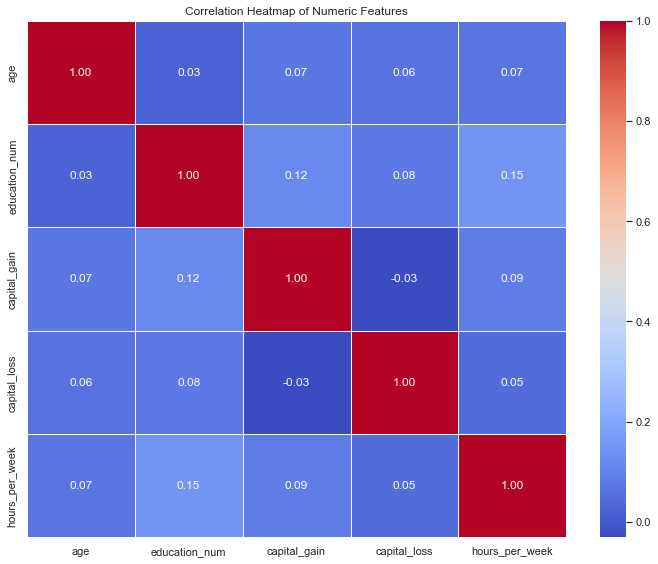

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("adult_combined_train_80_imputed_feature_selected.csv")

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()


### 🔍 Multicollinearity Analysis Summary

To assess the presence of multicollinearity among the numerical features in the dataset, a **correlation heatmap** and **Variance Inflation Factor (VIF)** analysis were performed on five numerical variables:

- `age`
- `education_num`
- `capital_gain`
- `capital_loss`
- `hours_per_week`

---

#### ✅ Correlation Heatmap

The heatmap revealed **no strong pairwise correlation** between any two numerical features, with all Pearson correlation coefficients falling below **0.15**. This suggests a **lack of direct linear relationships** between individual numerical predictors.

---

#### ⚠️ VIF Results

Despite the low pairwise correlations, the VIF values indicated the presence of **multicollinearity**, especially for:

| Feature           | VIF Score |
|-------------------|-----------|
| `education_num`   | 10.25     |
| `hours_per_week`  | 9.37      |
| `age`             | 7.07      |

These values suggest that some features may be **linearly predictable from a combination** of other variables, even if they aren't strongly correlated with any single one individually. This is consistent with how VIF captures multivariate linear relationships rather than just pairwise associations.

---

#### 🤖 Modeling Decision

Given the detection of multicollinearity through VIF, there is a potential that can adversely affect linear models. So, I opted to use **non-linear machine learning models**, including:

- **Gradient Boosting Machine (GBM)**
- **AdaBoost**
- **Random Forest**
- **Artificial Neural Network (ANN)**

These models:

- Are **not sensitive to multicollinearity** due to their **tree-based** or **non-parametric** architectures  
- Can **automatically down-weight or ignore redundant features**  
- Often yield **better performance** and **model stability** in the presence of correlated predictors

---
